In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df=pd.read_csv("Mushroom.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


This means we have 23 Columns

In [3]:
# Get Unique and Top values in the dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Cleaning

In [4]:
df.shape

(8124, 23)

This means we have 8124 rows and 23 columns

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

This means that the data is balanced

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This shows that there is no NULL data in the dataset

In [7]:
#first we will divide the data into training and testing dataset
x=df.drop('class',axis=1) #Predictors
y=df['class'] #target
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


This shows all the predictors in the data

In [8]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [9]:
# Write a loop that prints attibutes of each column
for attr in x.columns:
    print('\n', attr)
    print(x[attr].value_counts())


 cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 bruises
f    4748
t    3376
Name: bruises, dtype: int64

 odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

 gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

 gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

 gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

 gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

 stalk-root
b    3776
?    2480
e    1120
c     556
r  

As veil-type has only 1 attribute p, we can delete it as it will not have any impact

In [10]:
# Drop Veil-Type feature
df.drop(['veil-type'], axis=1, inplace=True)

# Data Visualization - EDA

In [11]:
# Write a function to plot classes vs. features
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        plt.figure(figsize=(10,8))
        ax = sns.countplot(x=df[col], hue=hue, data=df)

<Figure size 432x288 with 0 Axes>

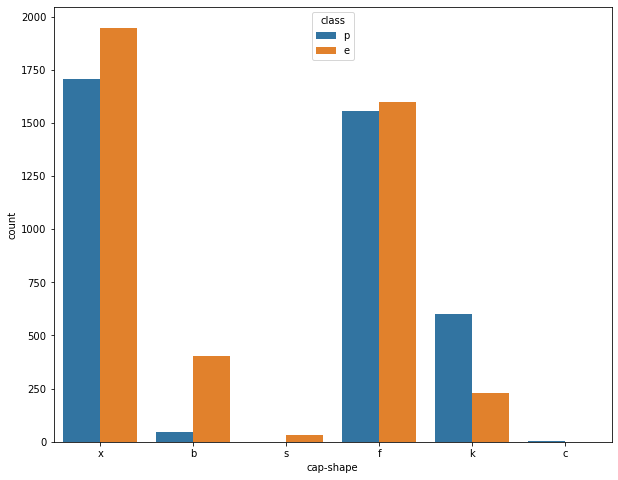

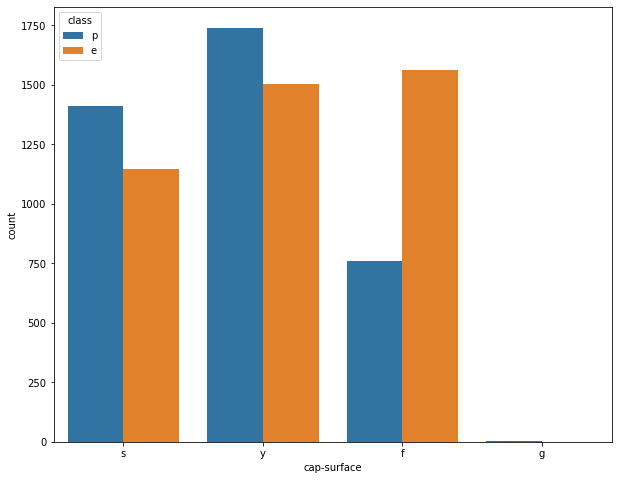

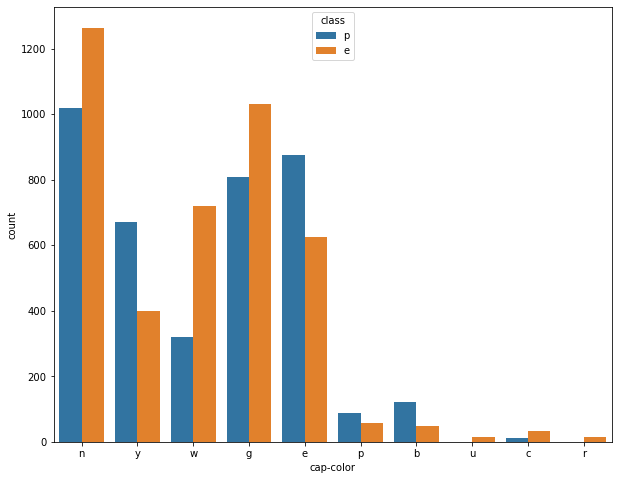

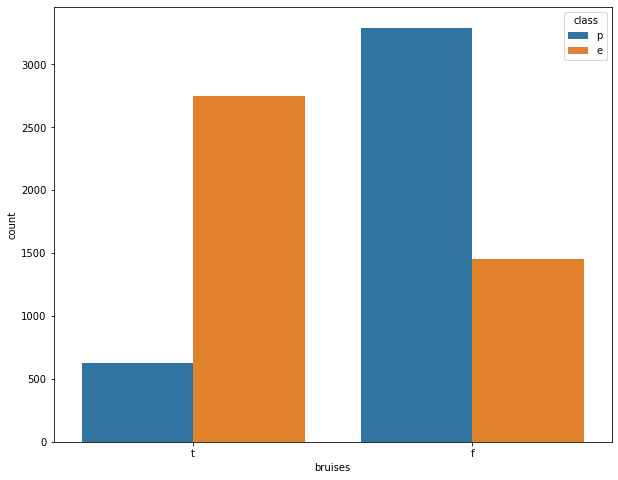

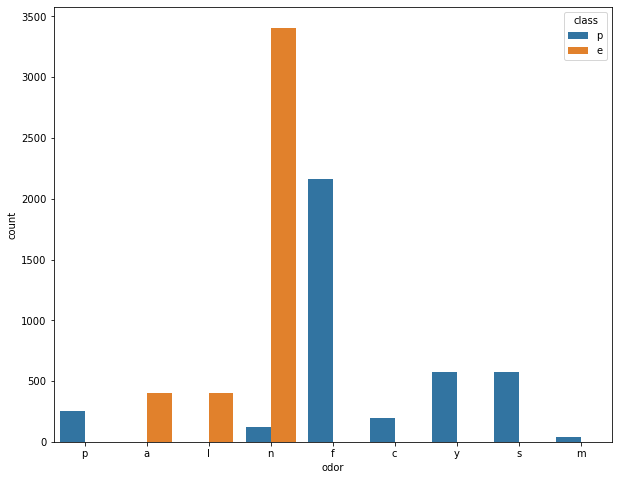

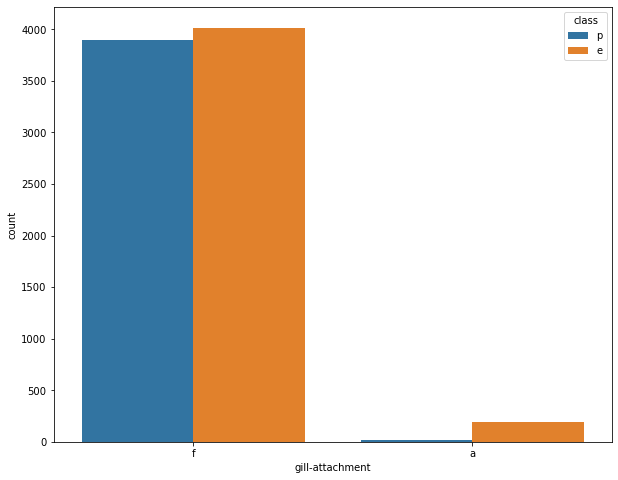

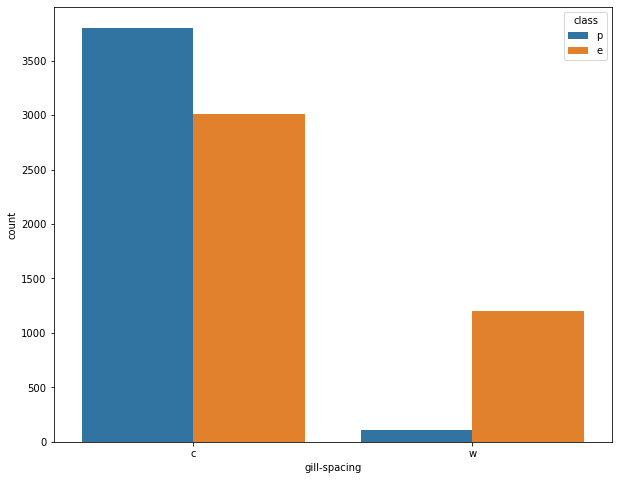

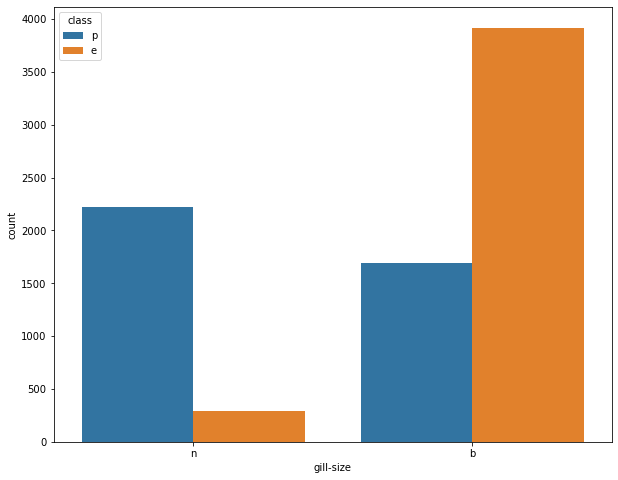

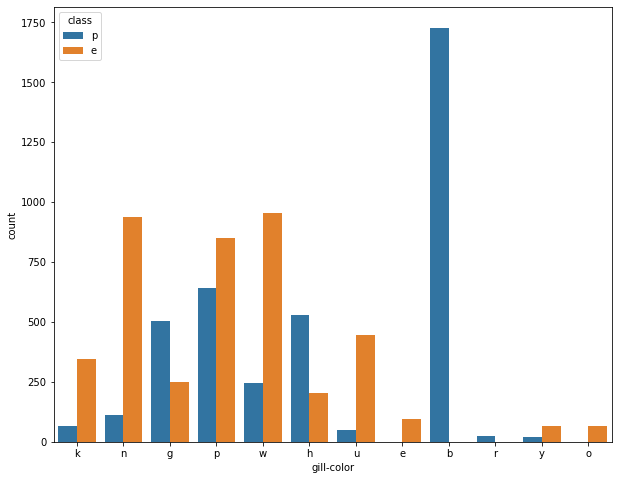

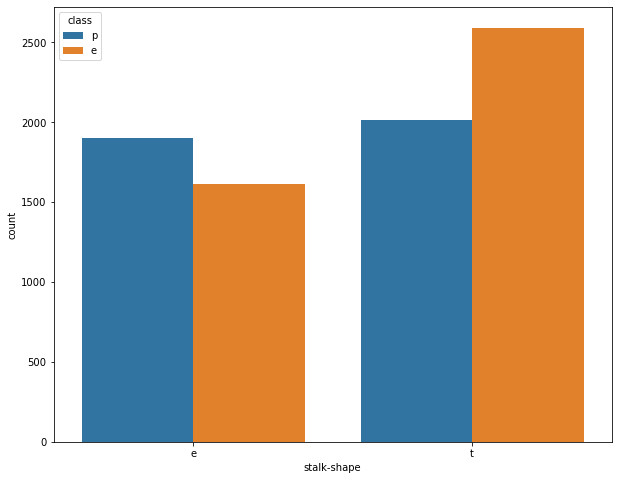

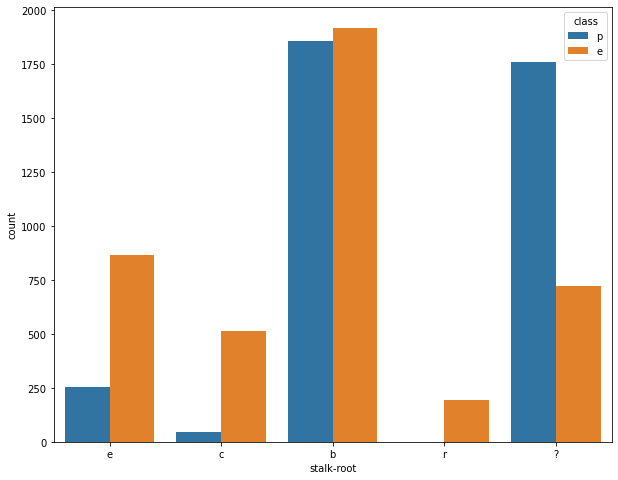

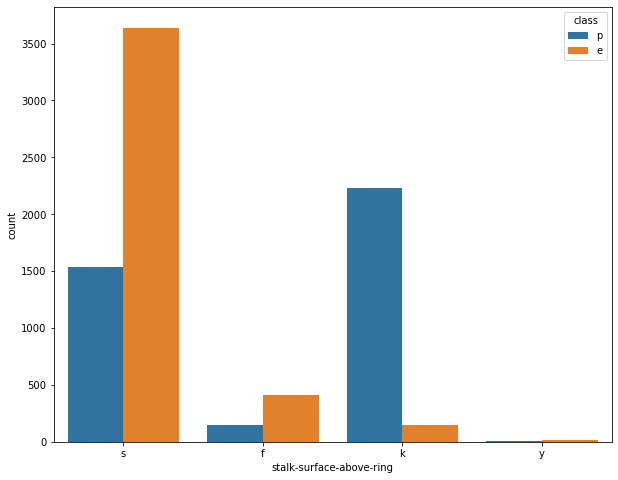

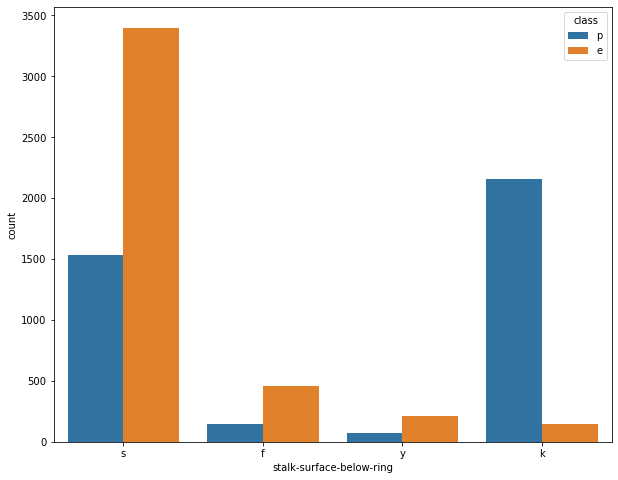

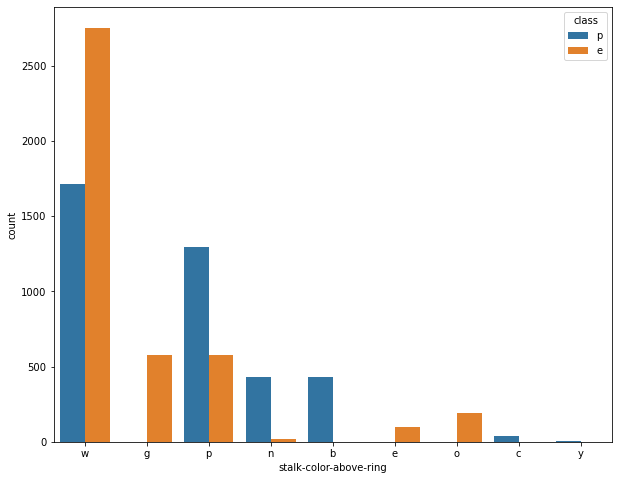

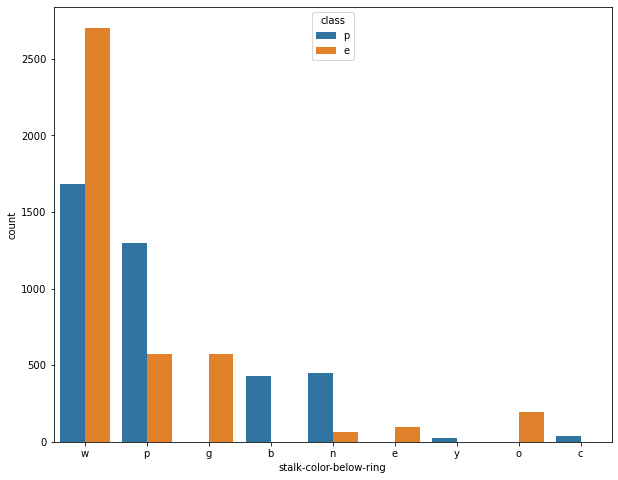

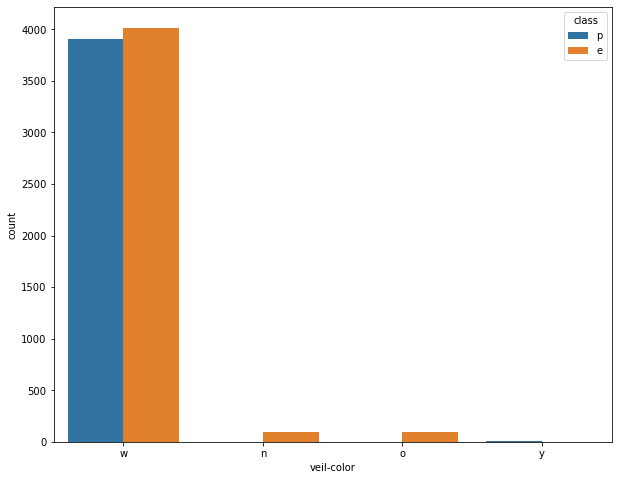

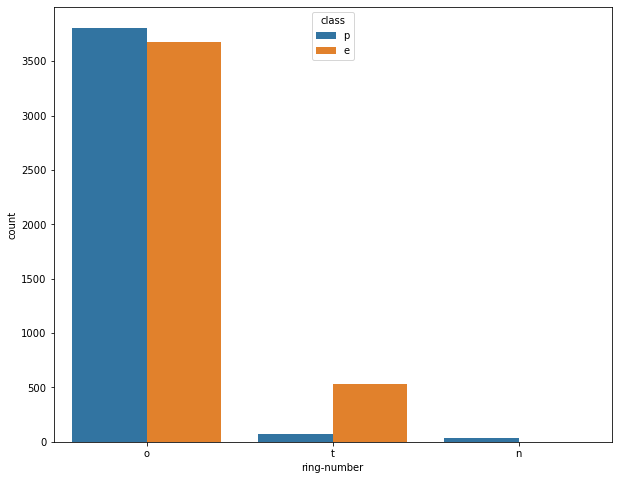

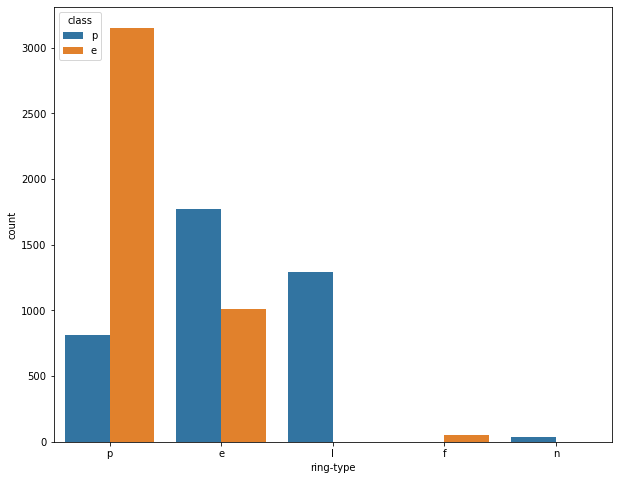

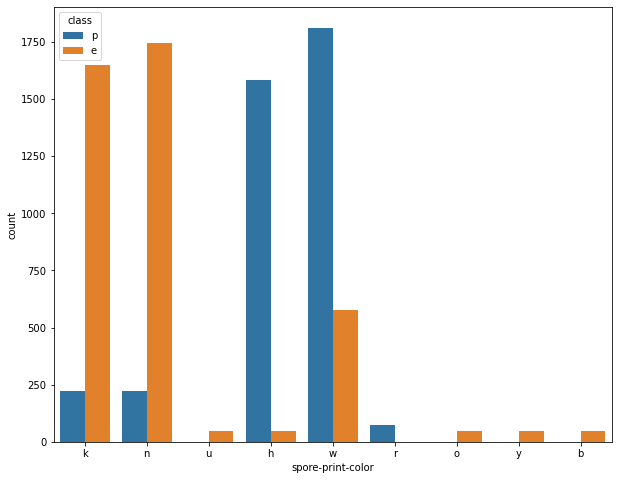

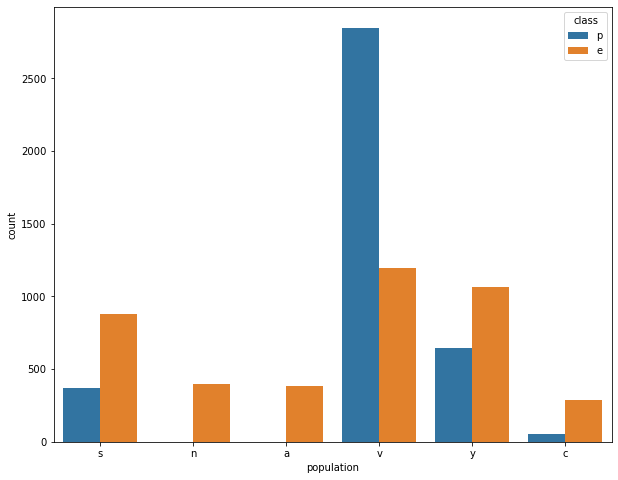

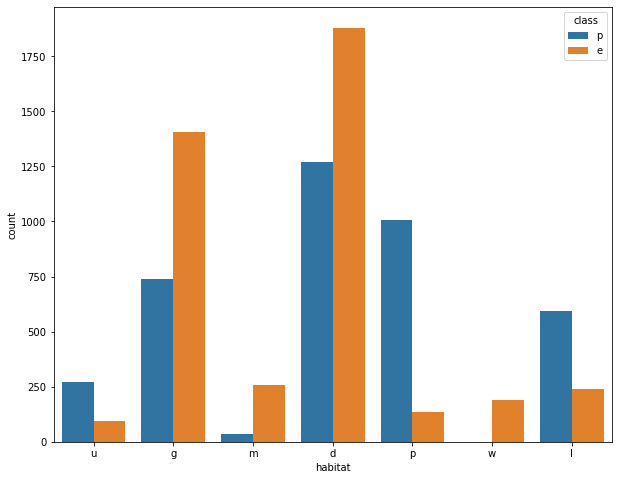

In [12]:
# Plot the features in which hue is idenitfied as 'class'
hue = df['class']
dataplot = df.drop('class', 1)
plot_data(hue, dataplot)


Cap Shape:  A bell shaped cap is more likely to be edible whereas knobbed as poisonous

Cap Surface: Fibrous surface ones are more likely to be edible. Smooth and scaly mushrooms are slightly more likely to be poisonous.

Cap Color: If the mushroom has a more white or gray surface, it’s likely to be edible. Yellow cap colors tend to be more poisonous.

Bruises: If the mushroom has bruises, it’s likely to be edible. If the mushroom does not have bruises, it’s more likely to be poisonous.

Odor: If the mushroom has no odor, it’s extremely likely to be edible. Any odor that is foul or pungent is highly likely to be poisonous.

Gill Attachments: There are no characteristics that could definitively classify the mushroom as edible or poisonous.

Gill Spacing: If the gills are closely spaced, it’s like to be poisonous. If they are crowded, then it’s more likely to be edible.

Gill Size: If the gills are narrow, it’s like to be poisonous. If they are broad, then it’s more likely to be edible.

Gill Color: Colors of buff are almost certain to be poisonous. Gray and chocolate colors are also likely to be poisonous. White, purple, and brown colors are likely to be edible.

Stalk Shape: Stalks are difficult to analyze for edibility.

Stalk Root: Missing roots are very likely to be poisonous. Club and equal roots are likely to be edible.

Stalk Surface Above Ring: Smooth stalks above the ring will likely be edible. Silky stalks are likely to be poisonous.

Stalk Surface Below Ring: Smooth stalks above the ring will likely be edible. Silky stalks are likely to be poisonous.

Stalk Color Above Ring: White and gray colors are likely to be edible. Buff, brown, and purple are likely to be poisonous.

Stalk Color Below Ring: White and gray colors are likely to be edible. Buff, brown, and purple are likely to be poisonous.

Veil Color: Veils are difficult to analyze for edibility.

Ring Number: Ring Numbers are difficult to analyze for edibility.

Ring Type: Pendant ring types are very likely to be edible. Evanescent and large ring types are likely to be poisonous.

Spore Print Color: Black and brown are highly likely to be edible. Tan and white colors are highly likely to be poisonous.

Population: Several mushrooms found in the population are likely to be poisonous. Numerous and abundant are likely to be edible.

Habitat: Mushrooms found in grasses and woody areas are likely to be edible. Mushrooms found on paths and leaves are likely to be poisonous.

In [13]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the datatype is object data

In [14]:
#Now, we have to change all the object type into integer type, so we will use Label encoder
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col]) 
    
df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


<AxesSubplot:>

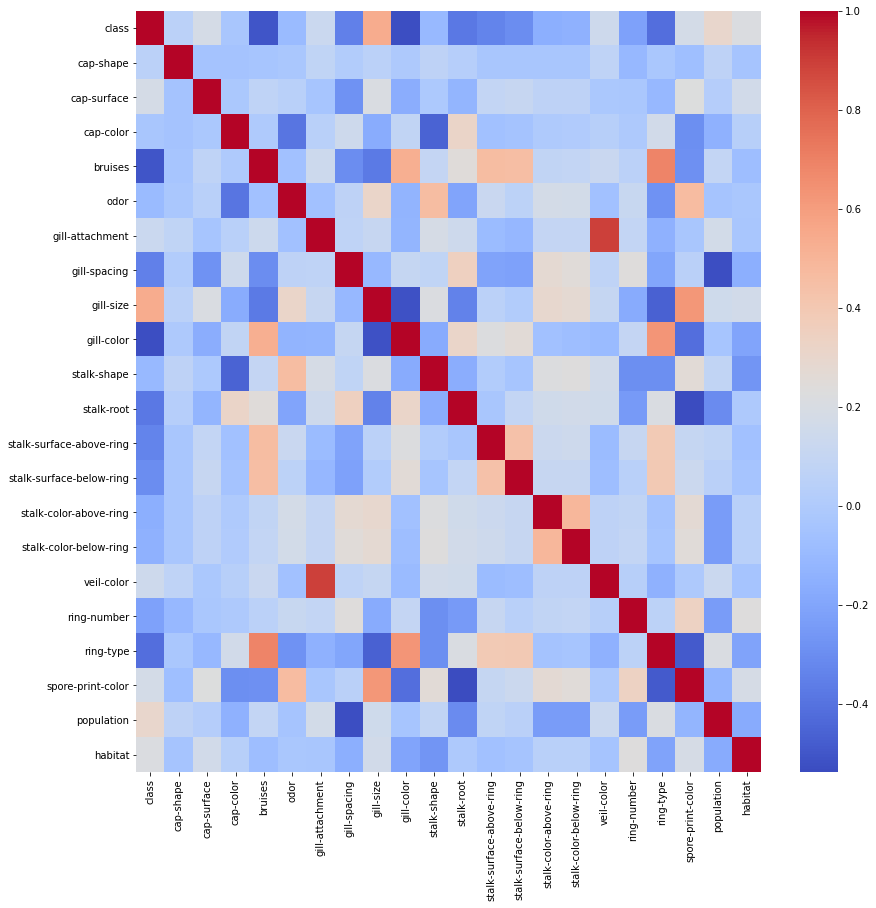

In [15]:
# Set correlation variable
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='coolwarm')

## Training and Testing

In [16]:
x=df_encoded.drop('class',axis=1) #Predictors
y=df_encoded['class'] #target

In [17]:
# Convert data to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=52)

In [19]:
x_train.shape

(5443, 21)

In [20]:
y_train.shape

(5443,)

In [21]:
x_test.shape

(2681, 21)

In [22]:
y_test.shape

(2681,)

In [23]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [24]:
pred=lg.predict(x_test)
print("accuracy_score :",accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score : 0.9518836255128683
[[1318   64]
 [  65 1234]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1382
           1       0.95      0.95      0.95      1299

    accuracy                           0.95      2681
   macro avg       0.95      0.95      0.95      2681
weighted avg       0.95      0.95      0.95      2681



In [25]:
model=[KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [26]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of KNeighborsClassifier() is :
1.0
[[1382    0]
 [   0 1299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1382
           1       1.00      1.00      1.00      1299

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



Accuracy score of GaussianNB() is :
0.9205520328235733
[[1284   98]
 [ 115 1184]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1382
           1       0.92      0.91      0.92      1299

    accuracy                           0.92      2681
   macro avg       0.92      0.92      0.92      2681
weighted avg       0.92      0.92      0.92      2681



Accuracy score of SVC() is :
1.0
[[1382    0]
 [   0 1299]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1382
           1  

In [27]:
#saving the best model
import joblib
#save the model as pickle in file
joblib.dump(SVC,'mushroom.pkl')

['mushroom.pkl']